## EDA (Customer Personality Analysis)

In [69]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

In [20]:
df= pd.read_csv('customer_data.csv',sep=';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [22]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [23]:
median=df.Income.median()

In [24]:
df.Income.fillna(median,inplace= True)

In [25]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [26]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [27]:
for column in df.columns:
    if df[column].dtype=="O":
        print(df[column].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-08-05     1
2012-11-18     1
2013-05-25     1
2013-04-14     1
2014-01-09     1
Name: Dt_Customer, Length: 663, dtype: int64


In [28]:
# Renaming categories of Education
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master')

In [29]:
df['Education'].value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [30]:
# Rename values in Marital_status 
df['Marital_Status'] = df['Marital_Status'].str.replace('Together','Married')
df['Marital_Status'] = df['Marital_Status'].str.replace('Divorced','Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow','Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone','Single')

In [31]:
df.drop(df[df['Marital_Status'] == 'Absurd'].index,inplace=True)
df.drop(df[df['Marital_Status'] == 'YOLO'].index,inplace = True)

In [33]:
df['Marital_Status'].value_counts()

Married    1444
Single      792
Name: Marital_Status, dtype: int64

In [34]:
#convert the column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format = True)


In [35]:
print(f"Last Purchased year {df['Dt_Customer'].max()}")

Last Purchased year 2014-06-29 00:00:00


In [36]:
# Convert columns kidhome and Teenhom into Children
#Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] =2015 - df['Year_Birth']

In [37]:
# Create total spending column
df['TotalSpend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

In [39]:
#checks how much of a customer's income is spent purchasing these products
df['Income_to_spend'] = round(df['TotalSpend']/df['Income'],3)

In [40]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Age,TotalSpend,Income_to_spend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,0,58,1617,0.028
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,2,61,27,0.001
2,4141,1965,Graduation,Married,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,0,50,776,0.011
3,6182,1984,Graduation,Married,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,1,31,53,0.002
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,1,34,422,0.007


In [41]:
#number of purchases the customer made
df['TotalNumPurchases'] = df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases


In [42]:
#number of purchases that were discounted
df['num_discounted'] = round(df['NumDealsPurchases']/df['TotalNumPurchases'],3)

In [43]:
#check which percent of purchases that were made per platform
df['web_to_total'] = round(df.NumWebPurchases/df.TotalNumPurchases,3)
df['catalog_to_total'] = round(df.NumCatalogPurchases/df.TotalNumPurchases,3)
df['Store_to_total'] = round(df.NumStorePurchases/df.TotalNumPurchases,3)

In [46]:
#counts the number of campaigns that the customer accepted
df['num_cmp'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response

<Axes: title={'center': 'TotalSpend'}, xlabel='Children'>

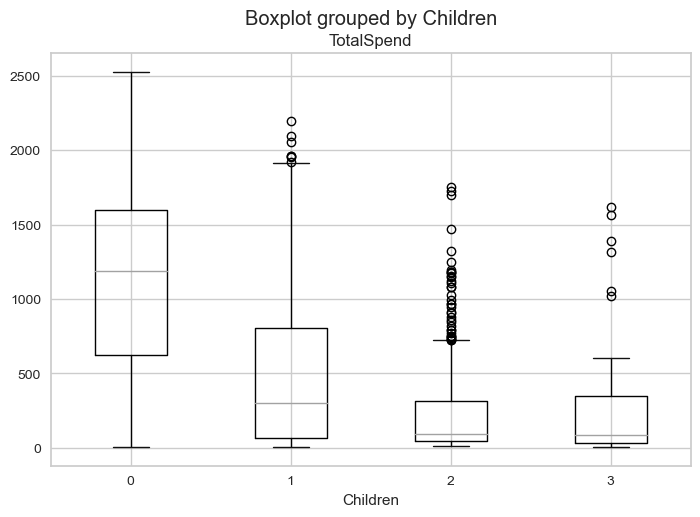

In [48]:
#graph to see if there is a relationship between total amount spent and number of children
df.boxplot(column = 'TotalSpend',by ='Children')

<Axes: >

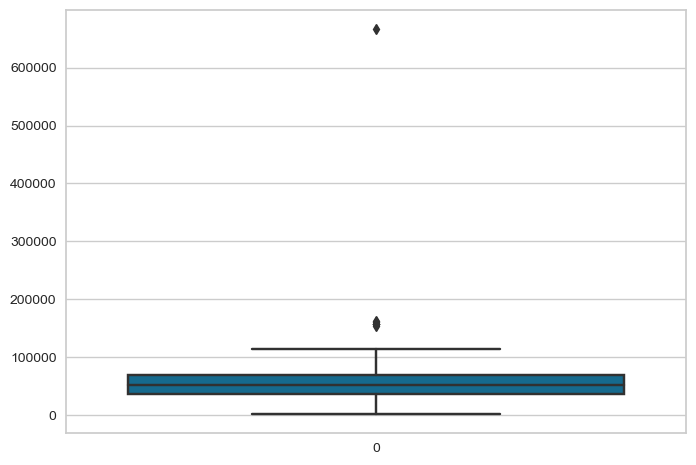

In [49]:
#graph to spot outliers
sns.boxplot(df['Income'])

<Axes: xlabel='Income', ylabel='Count'>

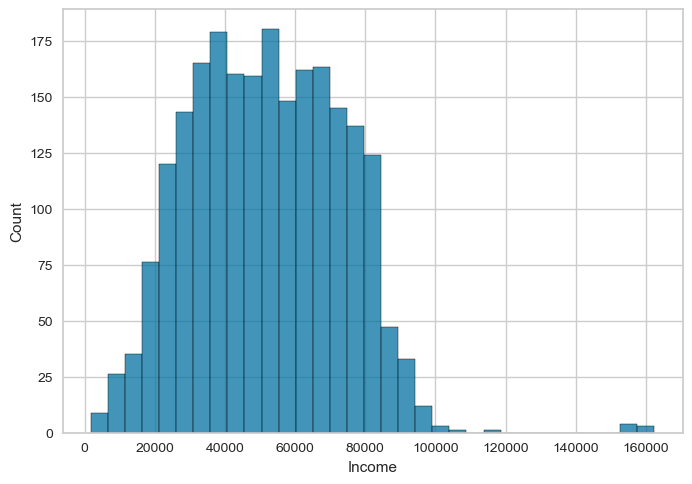

In [50]:
#removed the one big outlier spotted
df=df.loc[df.Income<df.Income.max()]
#check the distribution of the income, seems relatively normal
sns.histplot(df.Income)

<Axes: xlabel='TotalSpend', ylabel='Count'>

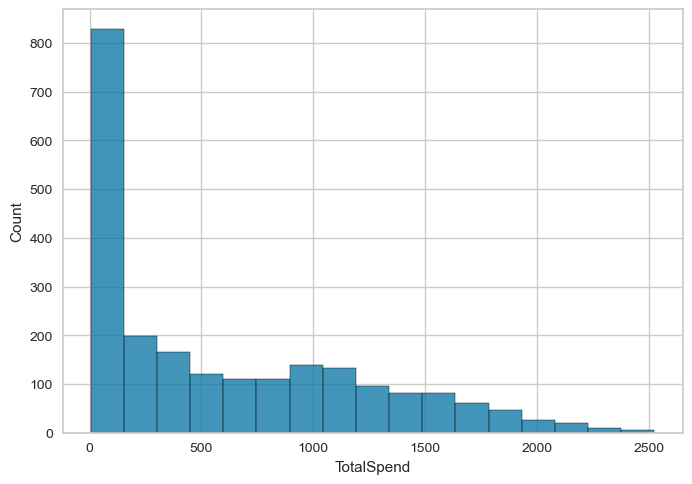

In [52]:
#check the distribution of amount spent and it seems skewed
sns.histplot(df.TotalSpend)

<Axes: xlabel='Education', ylabel='Income'>

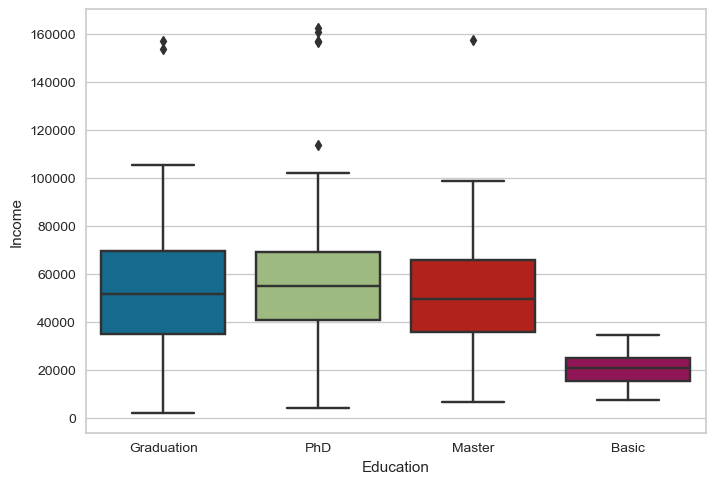

In [53]:
#checked to see if education had a big impact on income and aside from the basic education level, it did no seem like it
sns.boxplot(x=df.Education, y=df.Income)

<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

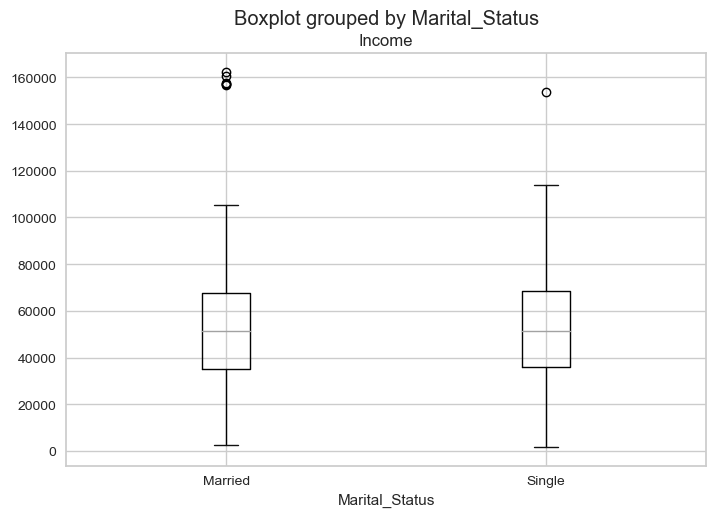

In [54]:
#checked the income range between different marital_statuses
df.boxplot(column = 'Income', by = 'Marital_Status')

In [57]:
#created a column to check if someone is a parent and if they had a partner
df['isParent'] = df.Children.apply(lambda x: 1 if x > 0 else 0)
df['withPartner'] = df.Marital_Status.apply(lambda x: 1 if x == 'Partner' else 0)


In [59]:
#checks for whole family size
df['famsize'] = df.Children + df.withPartner + 1

<Axes: >

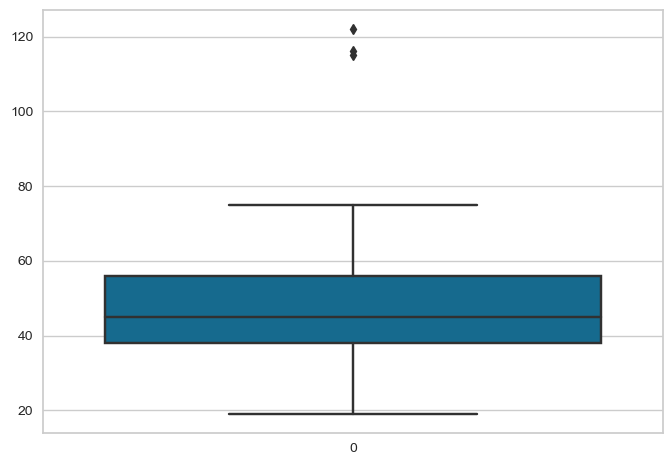

In [60]:
sns.boxplot(df['Age'])

<Axes: xlabel='TotalSpend', ylabel='TotalNumPurchases'>

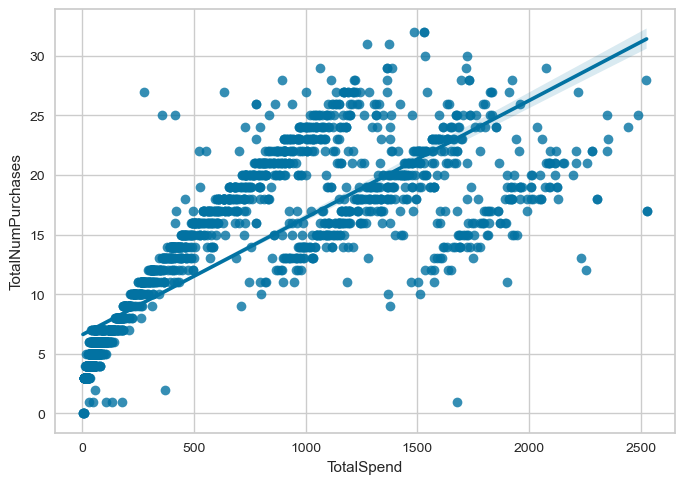

In [61]:
#spotted an outlier and put an age cap to limit it 
df = df.loc[df.Age < 100]
#check for the relationship between total amount spent and total number purhcases
sns.regplot(x = df.TotalSpend, y = df.TotalNumPurchases)

<Axes: xlabel='num_cmp', ylabel='TotalSpend'>

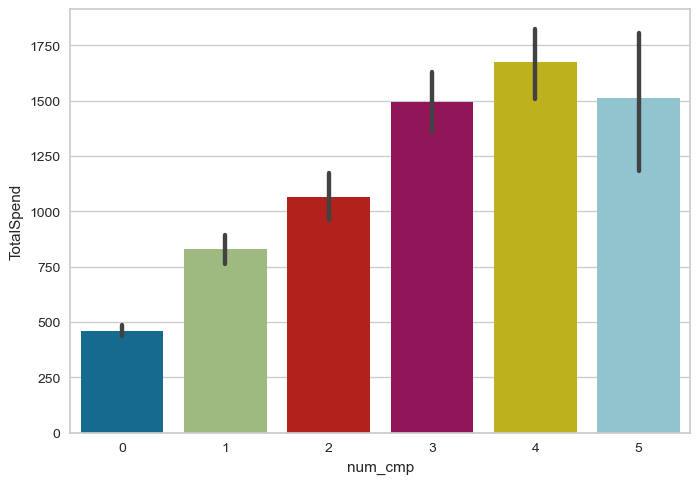

In [62]:
#check to see if the number of successful campaigns increased sales
sns.barplot(y = 'TotalSpend', x = 'num_cmp', data = df)

In [ ]:
df=df.drop(["Year_Birth", "Z_CostContact", "Z_Revenue",'Kidhome','Teenhome'], axis=1)

In [66]:
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Income_to_spend,TotalNumPurchases,num_discounted,web_to_total,catalog_to_total,Store_to_total,num_cmp,isParent,withPartner,famsize
0,5524,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,...,0.028,22,0.136,0.364,0.455,0.182,1,0,0,1
1,2174,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,...,0.001,4,0.500,0.250,0.250,0.500,0,1,0,3
2,4141,Graduation,Married,71613.0,2013-08-21,26,426,49,127,111,...,0.011,20,0.050,0.400,0.100,0.500,0,0,0,1
3,6182,Graduation,Married,26646.0,2014-02-10,26,11,4,20,10,...,0.002,6,0.333,0.333,0.000,0.667,0,1,0,2
4,5324,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,...,0.007,14,0.357,0.357,0.214,0.429,0,1,0,2


In [68]:
#Encode categorical data 
encode = LabelEncoder()
df['Education']=encode.fit_transform(df['Education'])
df['Marital_Status']=encode.fit_transform(df['Marital_Status'])
df.head()

C:\Users\samar\AppData\Local\Temp\ipykernel_14656\3026865577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']=encode.fit_transform(df['Education'])
C:\Users\samar\AppData\Local\Temp\ipykernel_14656\3026865577.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status']=encode.fit_transform(df['Marital_Status'])


,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Income_to_spend,TotalNumPurchases,num_discounted,web_to_total,catalog_to_total,Store_to_total,num_cmp,isParent,withPartner,famsize
0,5524,1,1,58138.0,2012-09-04,58,635,88,546,172,...,0.028,22,0.136,0.364,0.455,0.182,1,0,0,1
1,2174,1,1,46344.0,2014-03-08,38,11,1,6,2,...,0.001,4,0.500,0.250,0.250,0.500,0,1,0,3
2,4141,1,0,71613.0,2013-08-21,26,426,49,127,111,...,0.011,20,0.050,0.400,0.100,0.500,0,0,0,1
3,6182,1,0,26646.0,2014-02-10,26,11,4,20,10,...,0.002,6,0.333,0.333,0.000,0.667,0,1,0,2
4,5324,3,0,58293.0,2014-01-19,94,173,43,118,46,...,0.007,14,0.357,0.357,0.214,0.429,0,1,0,2


In [71]:
np.isinf(df.iloc[:]).sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Children               0
Age                    0
TotalSpend             0
Income_to_spend        0
TotalNumPurchases      0
num_discounted         2
web_to_total           0
catalog_to_total       0
Store_to_total         0
num_cmp                0
isParent               0
withPartner            0
famsize                0
dtype: int64

In [72]:
df.isna().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Children               0
Age                    0
TotalSpend             0
Income_to_spend        0
TotalNumPurchases      0
num_discounted         4
web_to_total           6
catalog_to_total       6
Store_to_total         6
num_cmp                0
isParent               0
withPartner            0
famsize                0
dtype: int64

In [73]:
#replace infinite values with null and then drop the null rows
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(axis = 0,inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2226 non-null   int64         
 1   Education            2226 non-null   int32         
 2   Marital_Status       2226 non-null   int32         
 3   Income               2226 non-null   float64       
 4   Dt_Customer          2226 non-null   datetime64[ns]
 5   Recency              2226 non-null   int64         
 6   MntWines             2226 non-null   int64         
 7   MntFruits            2226 non-null   int64         
 8   MntMeatProducts      2226 non-null   int64         
 9   MntFishProducts      2226 non-null   int64         
 10  MntSweetProducts     2226 non-null   int64         
 11  MntGoldProds         2226 non-null   int64         
 12  NumDealsPurchases    2226 non-null   int64         
 13  NumWebPurchases      2226 non-nul

In [78]:
#scale the values for kmeans clustering
features = ['Income', 'TotalSpend']
df1 = df[features]
fin_df1 = (df1 - df1.mean(axis=0)) / df1.std(axis=0)


In [79]:
fin_df1

,Income,TotalSpend
0,0.293808,1.676983
1,-0.264504,-0.963641
2,0.931697,0.280275
3,-1.196981,-0.920461
4,0.301146,-0.307637
...,...,...
2235,0.439848,1.218610
2236,0.571970,-0.271100
2237,0.239037,1.052533
2238,0.819599,0.391547


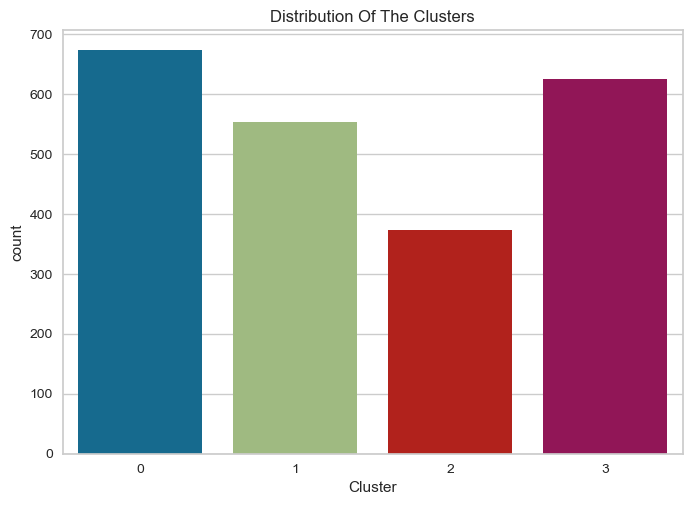

In [80]:
#cluster using kmeans
kmeans = KMeans(n_clusters=4, random_state=0)
df["Cluster"] = kmeans.fit_predict(fin_df1)

#chcek the distribution of the clusters
pl = sns.countplot(x=df["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

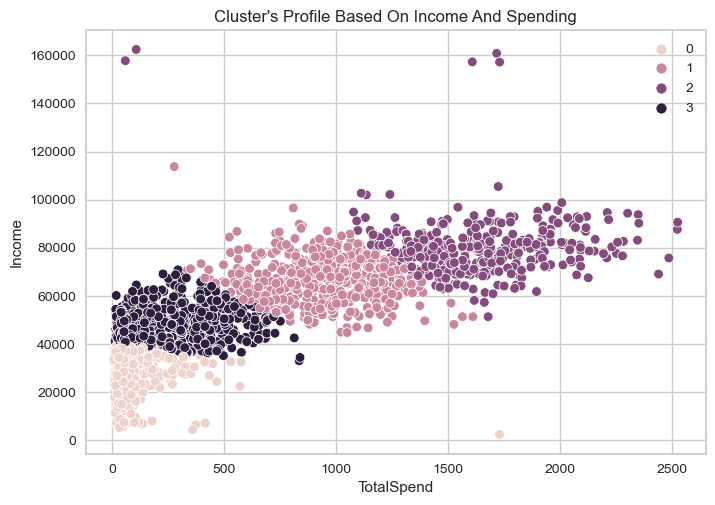

In [81]:
#check if there is a clear distinction between clusters with reference to income and total amount spent
pl = sns.scatterplot(data = df,x=df["TotalSpend"], y=df["Income"],hue=df["Cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2226 non-null   int64         
 1   Education            2226 non-null   int32         
 2   Marital_Status       2226 non-null   int32         
 3   Income               2226 non-null   float64       
 4   Dt_Customer          2226 non-null   datetime64[ns]
 5   Recency              2226 non-null   int64         
 6   MntWines             2226 non-null   int64         
 7   MntFruits            2226 non-null   int64         
 8   MntMeatProducts      2226 non-null   int64         
 9   MntFishProducts      2226 non-null   int64         
 10  MntSweetProducts     2226 non-null   int64         
 11  MntGoldProds         2226 non-null   int64         
 12  NumDealsPurchases    2226 non-null   int64         
 13  NumWebPurchases      2226 non-nul

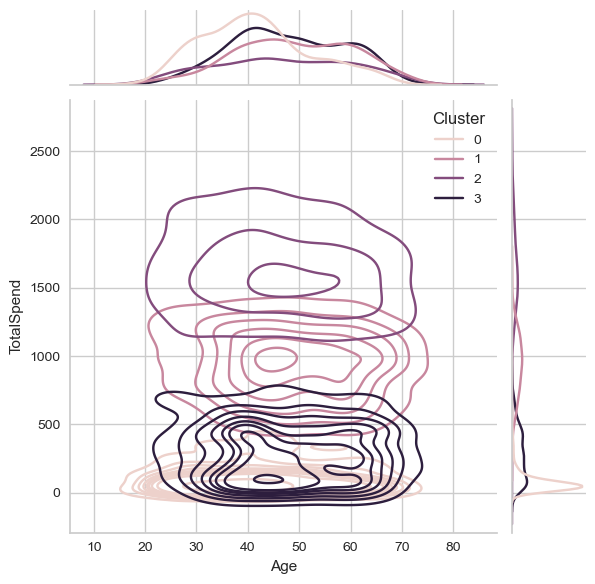

In [93]:
sns.jointplot(x=df['Age'], y=df["TotalSpend"], hue =df["Cluster"], kind="kde")


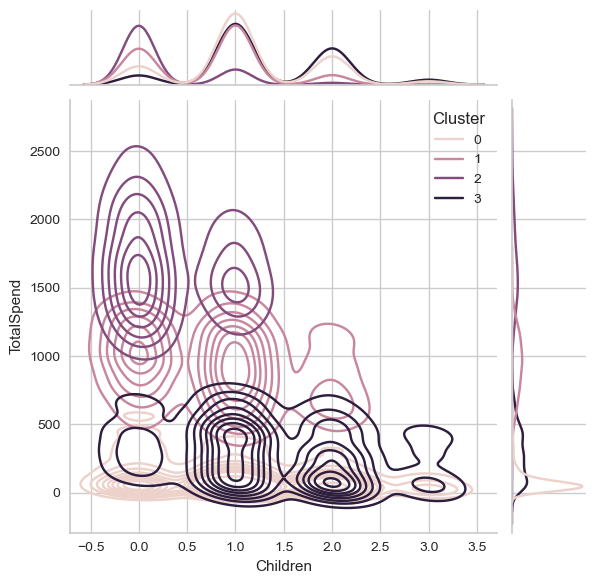

In [94]:
sns.jointplot(x=df['Children'], y=df["TotalSpend"], hue =df["Cluster"], kind="kde")


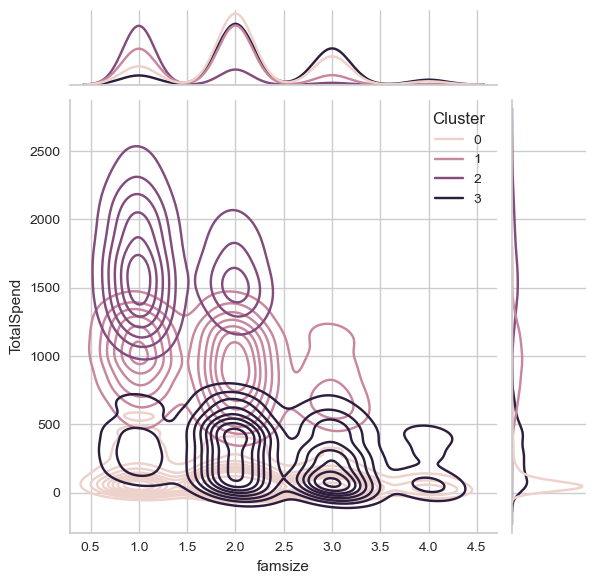

In [95]:
sns.jointplot(x=df['famsize'], y=df["TotalSpend"], hue =df["Cluster"], kind="kde")


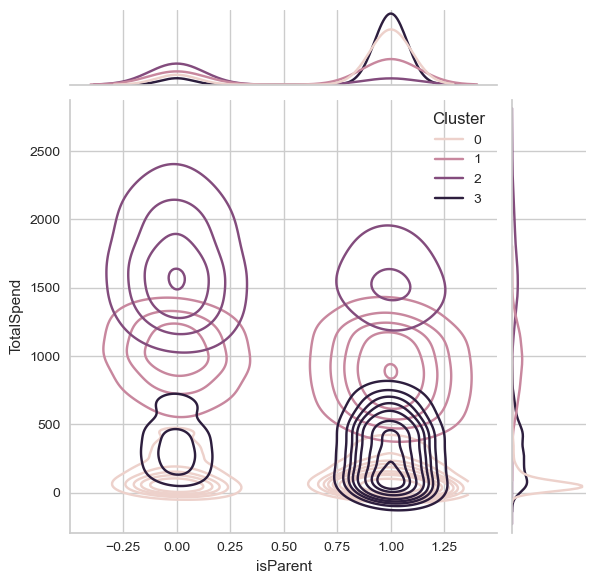

In [96]:
sns.jointplot(x=df['isParent'], y=df["TotalSpend"], hue =df["Cluster"], kind="kde")


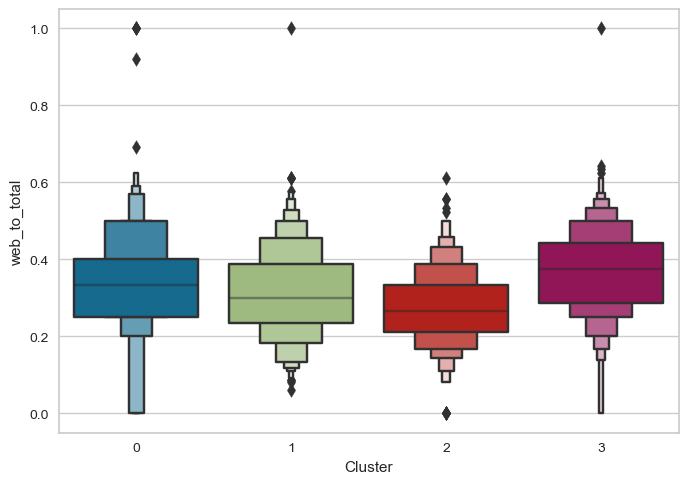

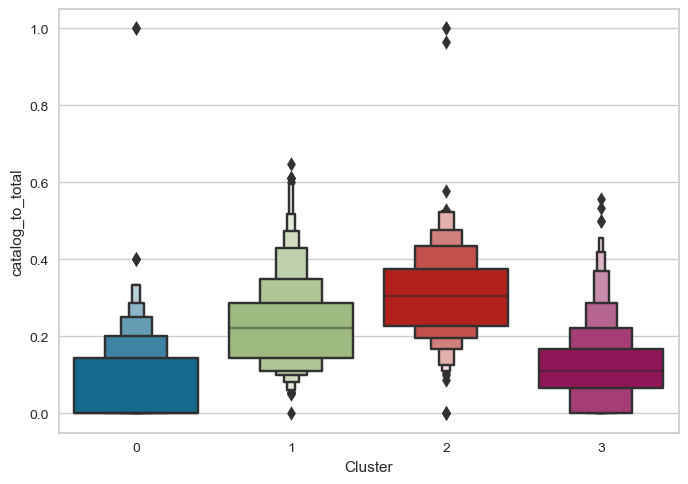

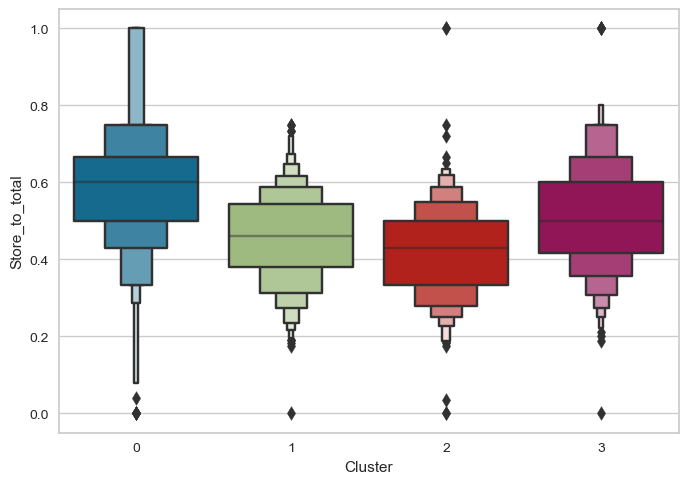

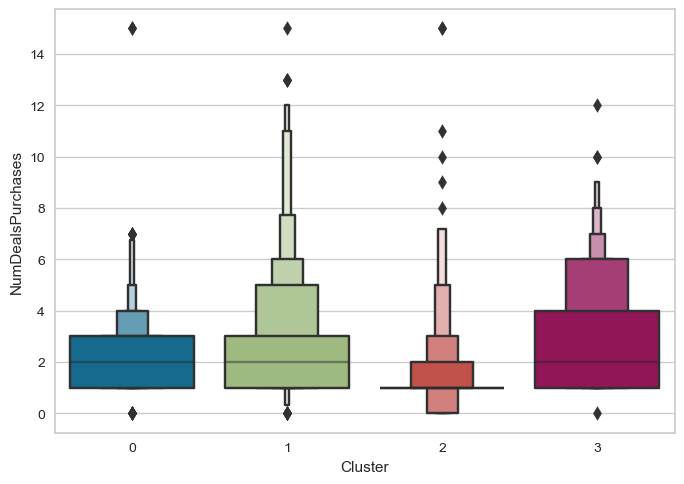

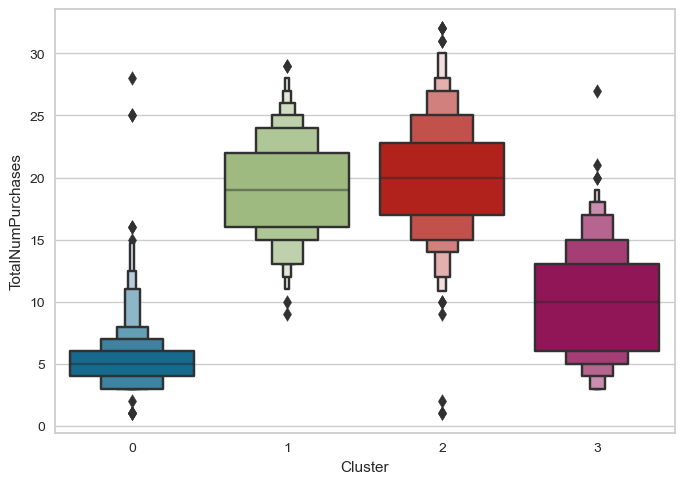

In [97]:
#Used ratios to better compare the mode of purchase between the clusters
trend = ["web_to_total", "catalog_to_total", "Store_to_total", "NumDealsPurchases", "TotalNumPurchases"]

for i in trend:
    plt.figure()
    sns.boxenplot(y=df[i], x =df["Cluster"])
    plt.show()

<Axes: xlabel='num_cmp', ylabel='count'>

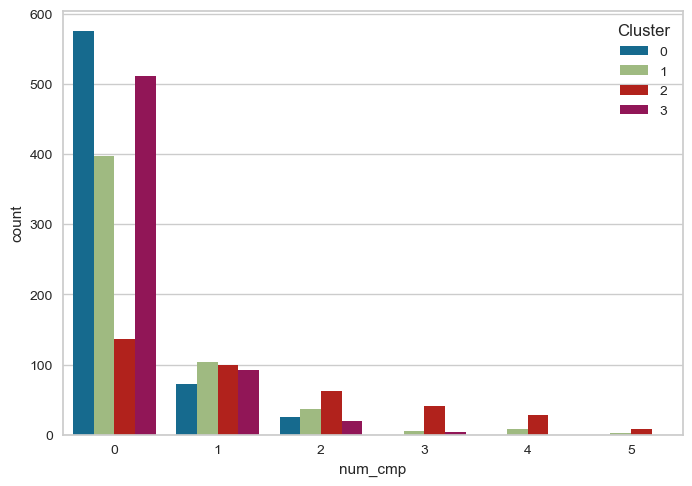

In [85]:
#check whether the campaigns were effective
sns.countplot(x=df["num_cmp"],hue=df["Cluster"])

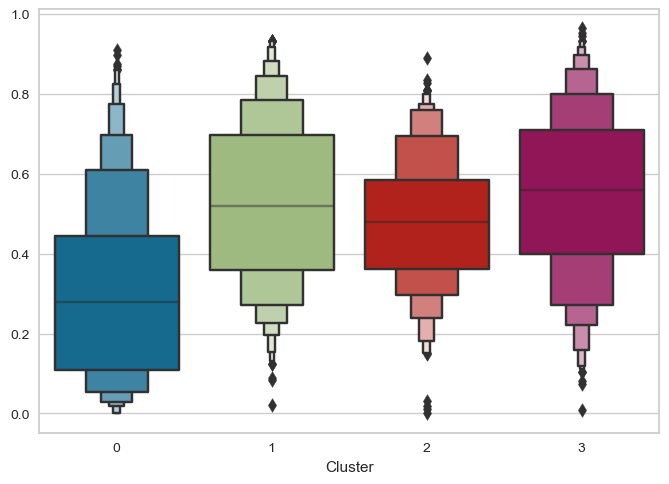

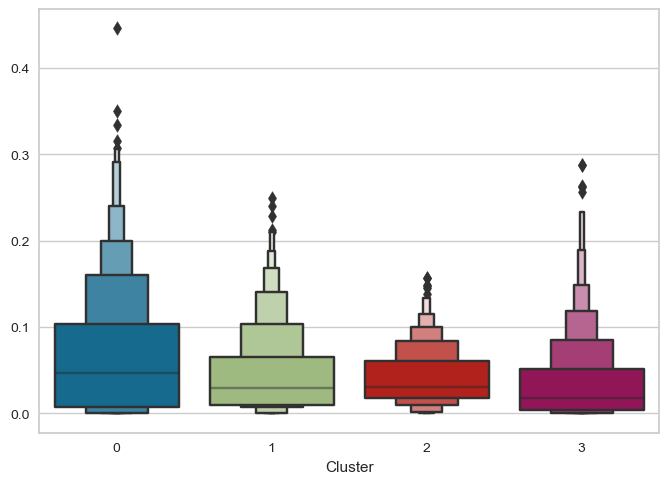

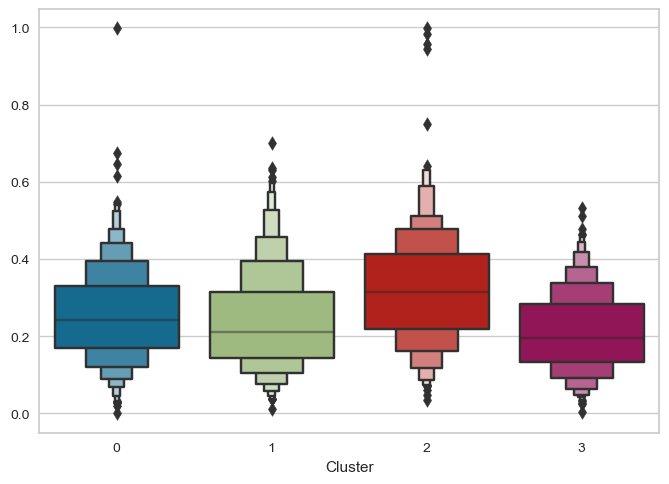

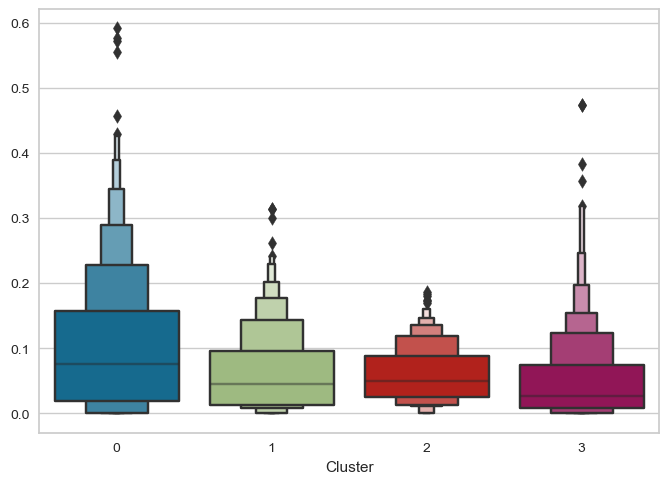

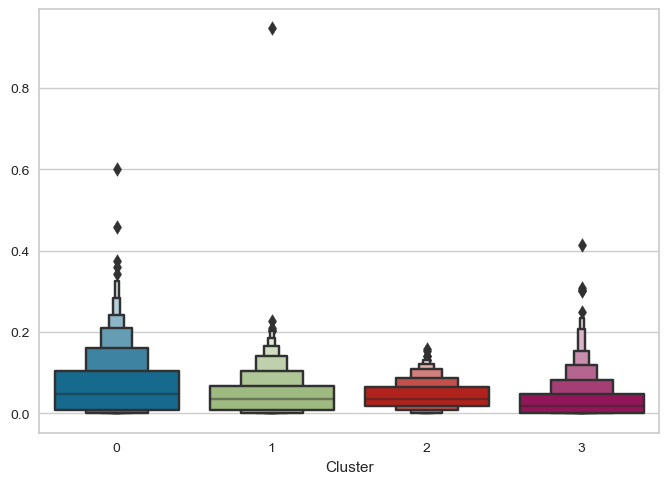

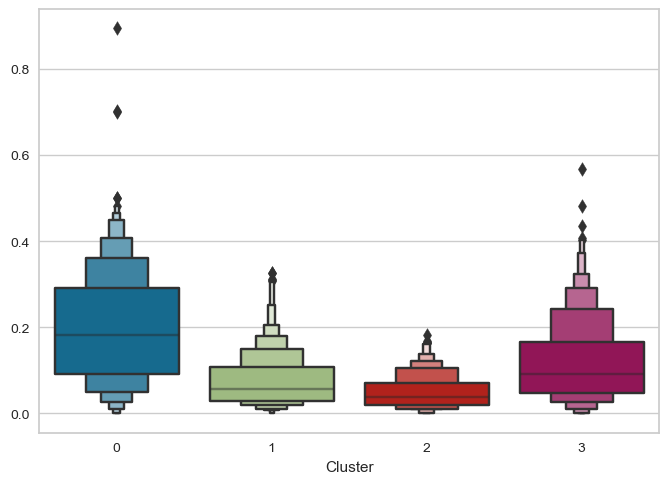

In [98]:
#check the amount to total ratio to be able to better compare product purchases between clusters
product = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts","MntSweetProducts", "MntGoldProds"]

for i in product:
    plt.figure()
    sns.boxenplot(y=(df[i]/df['TotalSpend']),  x=df["Cluster"])
    plt.show()

#### It seems that most of the clusters spend most of their money of wine
#### No significant difference in Age with respect to TotalSpend

#### cluster 0 - high income and medium expenses, varied ages, may or may not have kids, prefers stores, more liekly to take discounts
#### cluster 1 - low income and low expenses, varied ages, most likely has kids, mainly buys from stores even more than the other clusters, does not buy from catalogs much
##### cluster 2 - high income and high expenses, varied ages, most likely does not have kids, prefers stores, more likely to take part in campaigns
##### cluster 3 - medium income and low expenses, varied ages, most likely has 1-2 children, does not buy from catalogs much, prefers stores, more likely to buy discounted products.